# TMDB Movie Data Analysis using Pandas and APIs


In [1]:
# Setup and Imports
import sys
sys.path.append('..')
import os
import requests
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import logging
from typing import Optional
from src.extraction.fetch_data import TMDBDataFetcher
from src.transformation.process import MovieTransformer
from src.transformation.analysis import MovieAnalyzer
from src.visualization import MovieVisualizer

In [2]:
# Configure logging for the notebook environment
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

### Step 1: Fetch Movie Data from API

In [3]:
# Initialize the fetcher (it will find the .env in the root automatically)
fetcher = TMDBDataFetcher(env_path=".env")

# Execute the pipeline
movie_ids = [0, 299534, 19995, 140607, 299536, 597, 135397, 420818, 24428, 168259, 99861, 284054, 12445, 181808, 330457, 351286, 109445, 321612, 260513]
df_raw = fetcher.run_pipeline(movie_ids)

INFO: Starting extraction for 19 IDs...
INFO: Fetched: Avengers: Endgame
INFO: Fetched: Avatar
INFO: Fetched: Star Wars: The Force Awakens
INFO: Fetched: Avengers: Infinity War
INFO: Fetched: Titanic
INFO: Fetched: Jurassic World
INFO: Fetched: The Lion King
INFO: Fetched: The Avengers
INFO: Fetched: Furious 7
INFO: Fetched: Avengers: Age of Ultron
INFO: Fetched: Black Panther
INFO: Fetched: Harry Potter and the Deathly Hallows: Part 2
INFO: Fetched: Star Wars: The Last Jedi
INFO: Fetched: Frozen II
INFO: Fetched: Jurassic World: Fallen Kingdom
INFO: Fetched: Frozen
INFO: Fetched: Beauty and the Beast
INFO: Fetched: Incredibles 2
INFO: Data persisted to c:\Users\CourageDei\Desktop\Moodle\DE\DE02\notebook\..\src\extraction\../../data/raw\movies.json
INFO: Pipeline complete. 18 movies saved in 8.43s


# 

### Step 2: Data Cleaning and Preprocessing

In [4]:
# 1. Extraction
fetcher = TMDBDataFetcher()
df_raw = fetcher.run_pipeline([0, 299534, 19995, 140607, 299536, 597, 135397, 420818, 24428, 168259, 99861, 284054, 12445, 181808, 330457, 351286, 109445, 321612, 260513]) # Use real IDs

# 2. Transformation
transformer = MovieTransformer()
df_clean = transformer.run_transformation(df_raw)

# 3. Quick View
df_clean[['title', 'budget_musd', 'revenue_musd']].head()

INFO: Starting extraction for 19 IDs...
INFO: Fetched: Avengers: Endgame
INFO: Fetched: Avatar
INFO: Fetched: Star Wars: The Force Awakens
INFO: Fetched: Avengers: Infinity War
INFO: Fetched: Titanic
INFO: Fetched: Jurassic World
INFO: Fetched: The Lion King
INFO: Fetched: The Avengers
INFO: Fetched: Furious 7
INFO: Fetched: Avengers: Age of Ultron
INFO: Fetched: Black Panther
INFO: Fetched: Harry Potter and the Deathly Hallows: Part 2
INFO: Fetched: Star Wars: The Last Jedi
INFO: Fetched: Frozen II
INFO: Fetched: Jurassic World: Fallen Kingdom
INFO: Fetched: Frozen
INFO: Fetched: Beauty and the Beast
INFO: Fetched: Incredibles 2
INFO: Data persisted to c:\Users\CourageDei\Desktop\Moodle\DE\DE02\notebook\..\src\extraction\../../data/raw\movies.json
INFO: Pipeline complete. 18 movies saved in 8.13s
INFO: Starting transformation pipeline...
INFO: Quality Filter: 18 -> 18 rows
INFO: Cleaned data saved to c:\Users\CourageDei\Desktop\Moodle\DE\DE02\notebook\..\src\transformation\../../data/

,title,budget_musd,revenue_musd
0,Avengers: Endgame,356.0,2799.439100
1,Avatar,237.0,2923.706026
2,Star Wars: The Force Awakens,245.0,2068.223624
3,Avengers: Infinity War,300.0,2052.415039
4,Titanic,200.0,2264.162353


In [5]:
# Initialize
analyzer = MovieAnalyzer("../data/processed/movies_clean.csv")
analyzer.enrich_with_credits("../data/raw/movies.json")

# 1. KPI Rankings
print("--- Highest ROI (Budget >= 10M) ---")
roi_mask = analyzer.df['budget_musd'] >= 10
display(analyzer.rank_movies('roi', mask=roi_mask))

print("--- Highest Rated (Votes >= 10) ---")
vote_mask = analyzer.df['vote_count'] >= 10
display(analyzer.rank_movies('vote_average', mask=vote_mask, show_cols=['title', 'vote_average', 'vote_count']))

# 2. Advanced Search Queries
print("--- Search 1: Bruce Willis (Sci-Fi / Action) ---")
search_1_mask = (
    analyzer.df['genres'].str.contains("Science Fiction", case=False, na=False) & 
    analyzer.df['genres'].str.contains("Action", case=False, na=False) & 
    analyzer.df['cast'].str.contains("Bruce Willis", case=False, na=False)
)
display(analyzer.rank_movies('vote_average', mask=search_1_mask))

print("--- Search 2: Uma Thurman & Quentin Tarantino (Shortest First) ---")
search_2_mask = (
    analyzer.df['cast'].str.contains("Uma Thurman", na=False) & 
    analyzer.df['director'].str.contains("Quentin Tarantino", na=False)
)
display(analyzer.rank_movies('runtime', ascending=True, mask=search_2_mask, show_cols=['title', 'runtime', 'director']))

# 3. Aggregated Performance
print("--- Franchise vs Standalone ---")
display(analyzer.get_franchise_comparison())

print("--- Most Successful Franchises ---")
display(analyzer.get_most_successful_franchises())

print("--- Most Successful Directors ---")
display(analyzer.get_most_successful_directors())

INFO: Loaded 18 rows from cleaned CSV.
INFO: KPIs verified.
INFO: Enriched cleaned data with cast/director features.


--- Highest ROI (Budget >= 10M) ---


,title,roi,genres,revenue_musd,profit_musd,roi,vote_average
1,Avatar,12.336312,Action|Adventure|Fantasy|Science Fiction,2923.706026,2686.706026,12.336312,7.599
4,Titanic,11.320812,Drama|Romance,2264.162353,2064.162353,11.320812,7.900
5,Jurassic World,11.143583,Action|Adventure|Science Fiction|Thriller,1671.537444,1521.537444,11.143583,6.700
11,Harry Potter and the Deathly Hallows: Part 2,10.732090,Adventure|Fantasy,1341.511219,1216.511219,10.732090,8.083
13,Frozen II,9.691223,Family|Animation|Adventure|Comedy|Fantasy,1453.683476,1303.683476,9.691223,7.239


--- Highest Rated (Votes >= 10) ---


,title,vote_average,vote_count
0,Avengers: Endgame,8.237,27092
3,Avengers: Infinity War,8.235,31308
11,Harry Potter and the Deathly Hallows: Part 2,8.083,21556
4,Titanic,7.900,26629
7,The Avengers,7.894,34857


--- Search 1: Bruce Willis (Sci-Fi / Action) ---


,title,vote_average,genres,revenue_musd,profit_musd,roi,vote_average


--- Search 2: Uma Thurman & Quentin Tarantino (Shortest First) ---


,title,runtime,director


--- Franchise vs Standalone ---


,revenue_musd,roi,budget_musd,popularity,vote_average,movie_count
is_franchise,,,,,,
Standalone,1765.14,9.62,180.0,26.85,7.43,2
Franchise,1682.67,7.79,218.0,22.77,7.39,16


--- Most Successful Franchises ---


,title_count,budget_musd_sum,budget_musd_mean,revenue_musd_sum,revenue_musd_mean,vote_average_mean
belongs_to_collection,,,,,,
The Avengers Collection,4,1111.0,277.75,7776.07,1944.02,7.91
Star Wars Collection,2,545.0,272.50,3400.92,1700.46,7.03
Jurassic Park Collection,2,320.0,160.00,2982.01,1491.00,6.62
Avatar Collection,1,237.0,237.00,2923.71,2923.71,7.60
Frozen Collection,2,300.0,150.00,2727.90,1363.95,7.24


--- Most Successful Directors ---


,total_movies,total_revenue,vote_average
director,,,
James Cameron,2,5187.87,7.75
Joss Whedon,2,2924.22,7.58
Anthony Russo|Joe Russo,1,2799.44,8.24
J.J. Abrams,1,2068.22,7.30
Joe Russo|Anthony Russo,1,2052.42,8.24


In [6]:
# 1. Fetch & Transform
df_clean = pd.read_csv("../data/processed/movies_clean.csv")

# 2. Analyze
analyzer = MovieAnalyzer("../data/processed/movies_clean.csv")
analyzer.enrich_with_credits("../data/raw/movies.json")

INFO: Loaded 18 rows from cleaned CSV.
INFO: KPIs verified.
INFO: Enriched cleaned data with cast/director features.


### Step 4: Data Visualization

INFO: Visualizer data preparation complete.
INFO: Figure exported to: c:\Users\CourageDei\Desktop\Moodle\DE\DE02\notebook\..\src\../reports/figures\revenue_vs_budget.png


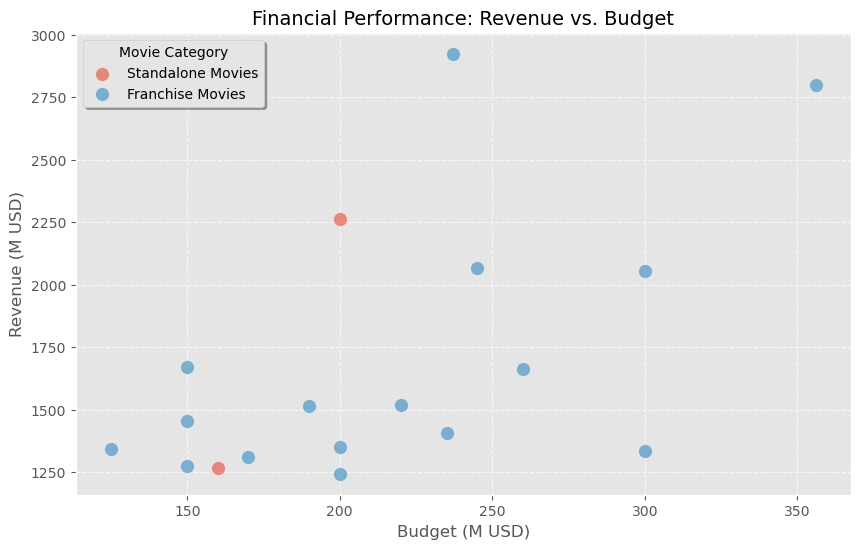

In [7]:
viz = MovieVisualizer(analyzer.df)

# Revenue vs Budget
viz.plot_revenue_vs_budget()

INFO: Figure exported to: c:\Users\CourageDei\Desktop\Moodle\DE\DE02\notebook\..\src\../reports/figures\genre_roi_distribution.png


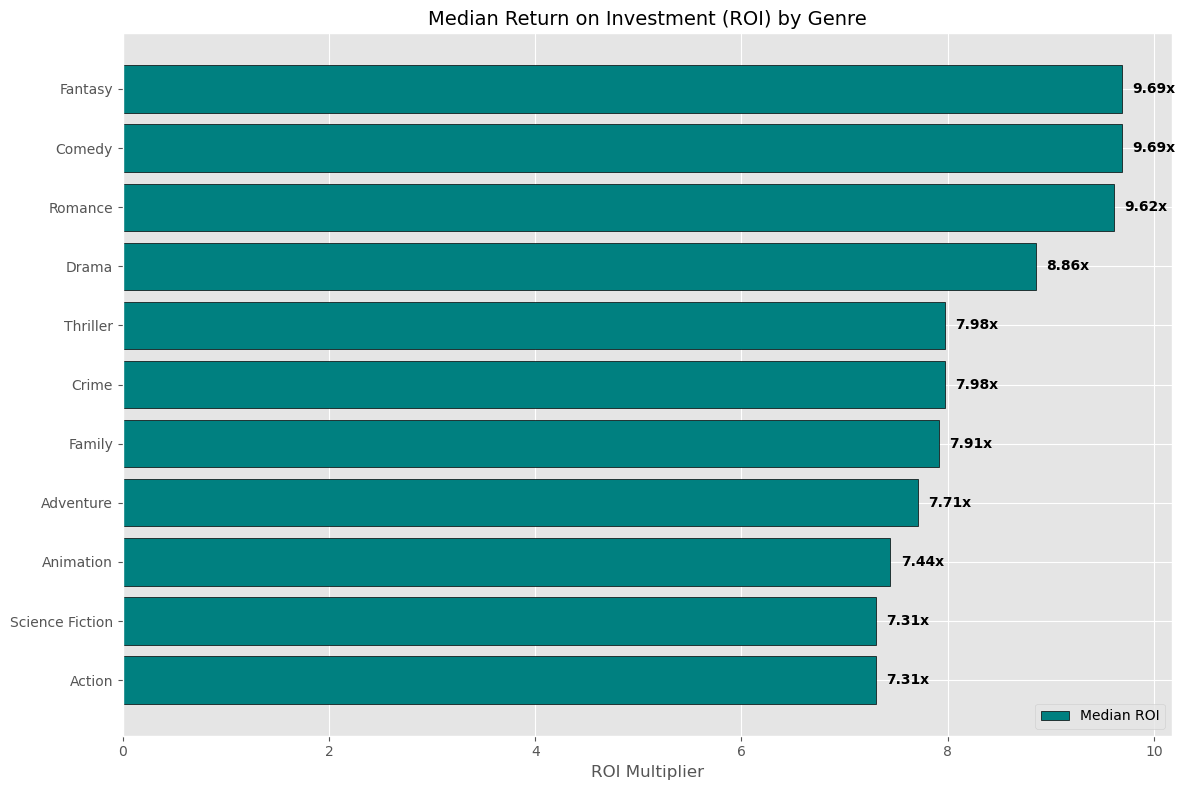

In [8]:
# ROI by Genre
viz.plot_genre_roi()

INFO: Figure exported to: c:\Users\CourageDei\Desktop\Moodle\DE\DE02\notebook\..\src\../reports/figures\popularity_vs_rating.png


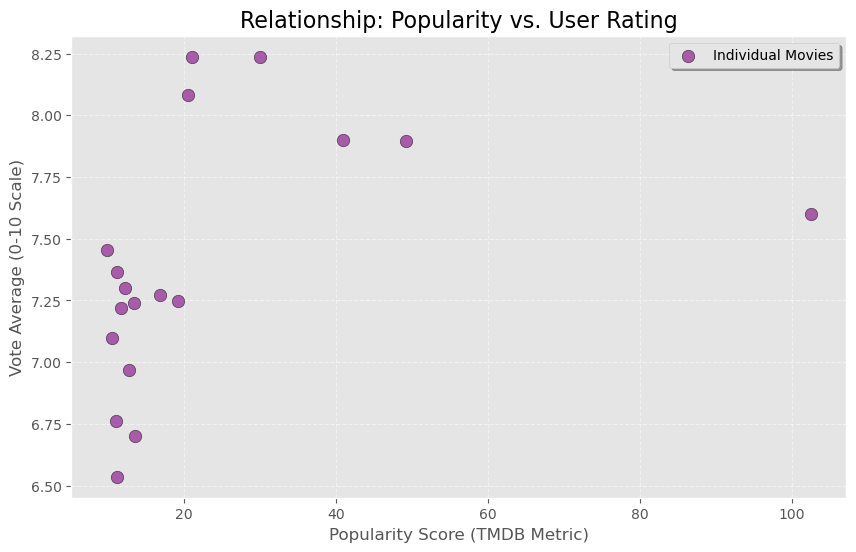

In [9]:
# Popularity vs Rating
viz.plot_popularity_vs_rating()

INFO: Figure exported to: c:\Users\CourageDei\Desktop\Moodle\DE\DE02\notebook\..\src\../reports/figures\yearly_performance_trends.png


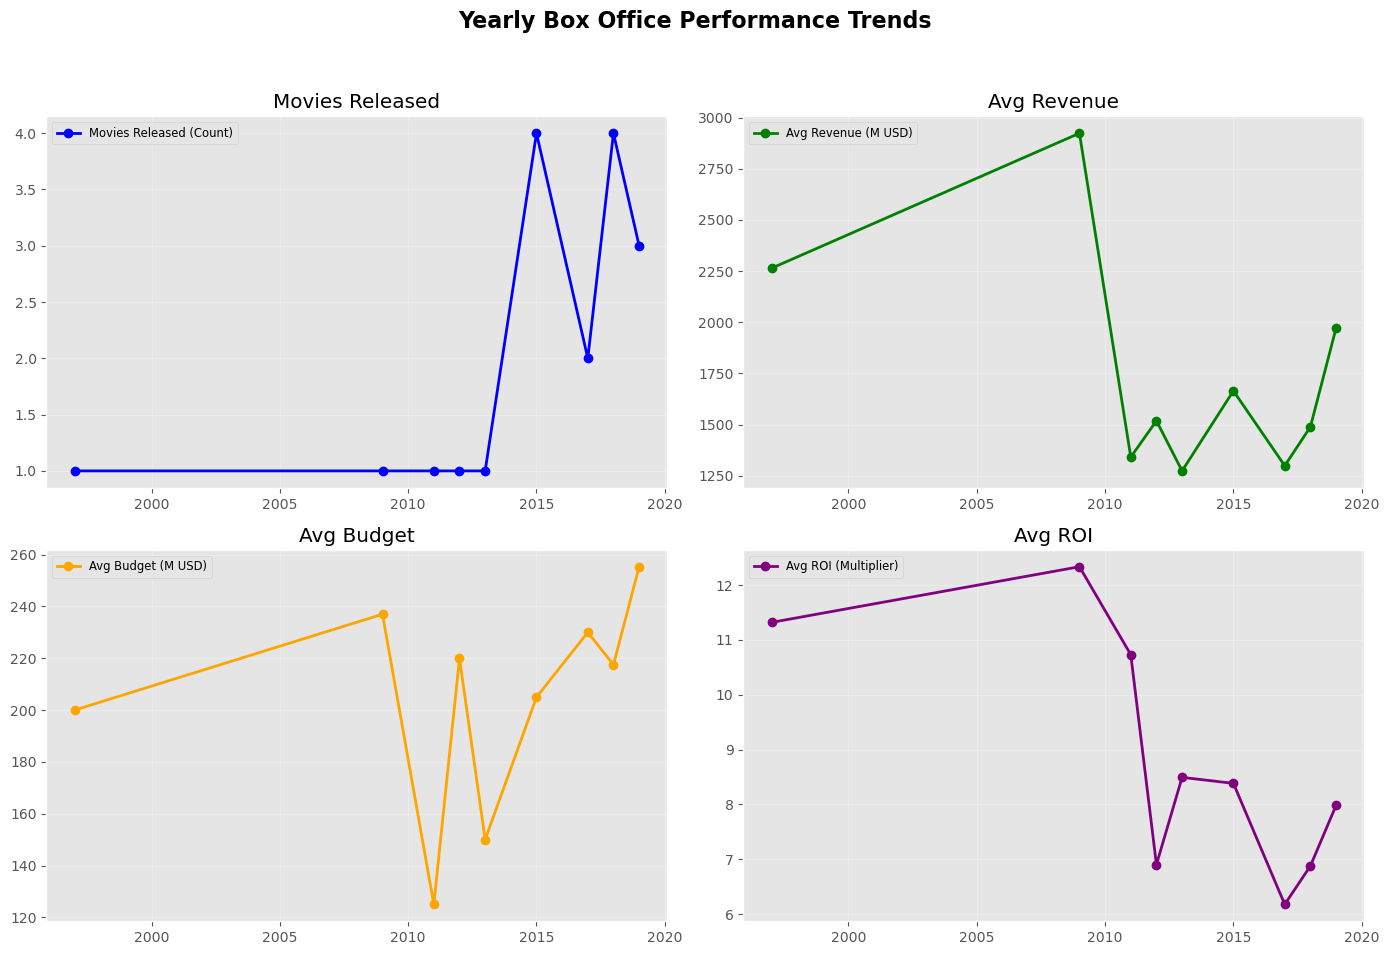

In [10]:
# yearly Trends
viz.plot_yearly_trends()

INFO: Figure exported to: c:\Users\CourageDei\Desktop\Moodle\DE\DE02\notebook\..\src\../reports/figures\franchise_vs_standalone.png


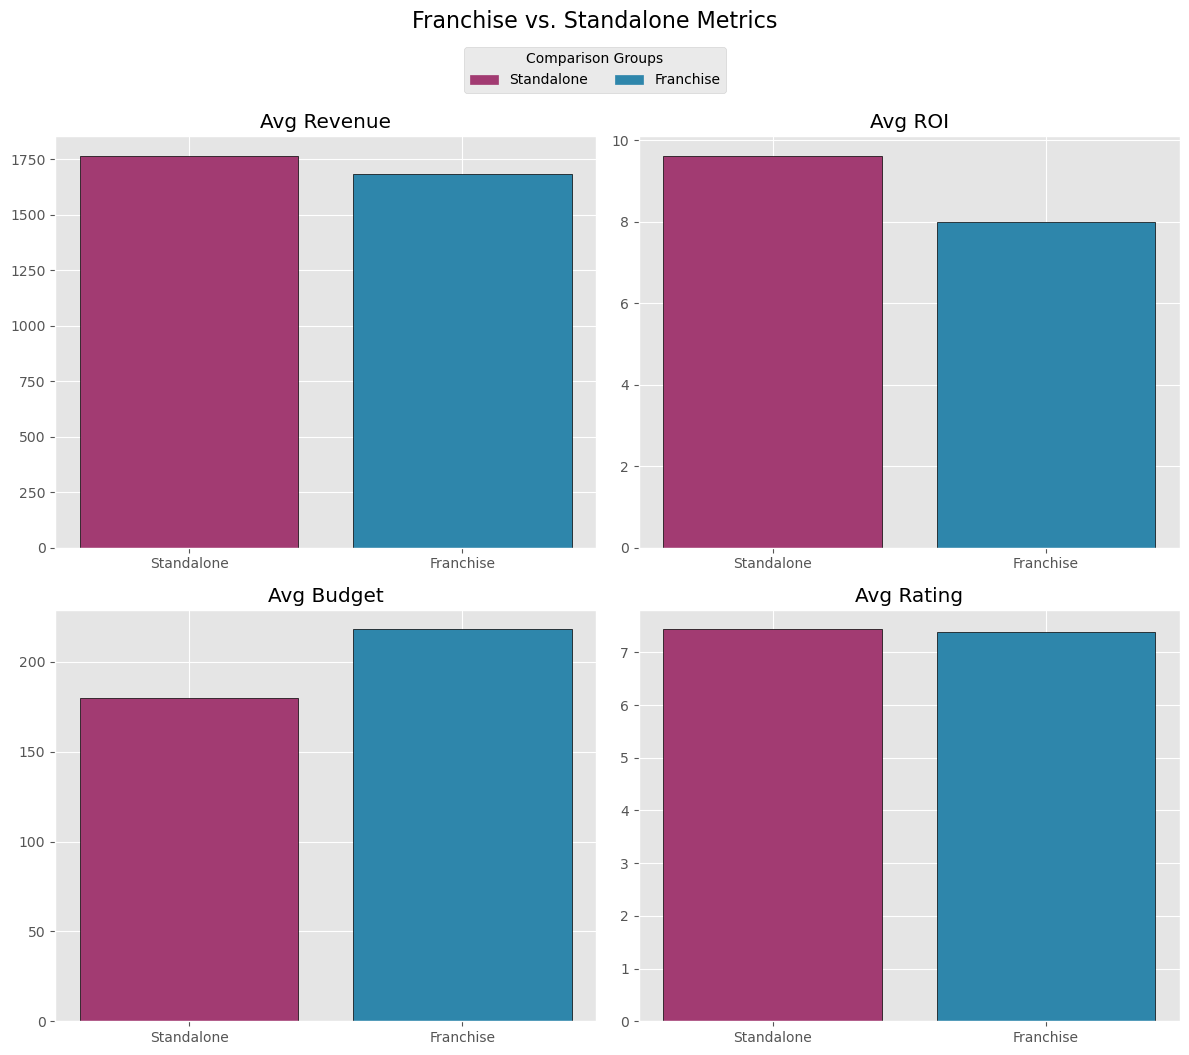

In [11]:
# franchise Comparison
viz.plot_franchise_comparison()